In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Lets load the Boston House Pricing Dataset

In [10]:
#from sklearn.datasets import load_boston
from sklearn.datasets import fetch_openml

# Load the Boston Housing dataset
boston = fetch_openml(name='boston', version=2)

# Access features and target
X, y = boston.data, boston.target

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [11]:
y

0      N
1      P
2      N
3      N
4      N
      ..
501    P
502    P
503    N
504    P
505    P
Name: binaryClass, Length: 506, dtype: category
Categories (2, object): ['N', 'P']

In [12]:
boston.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [13]:
## Lets check the description of the dataset
print(boston.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

Binarized version of the original data set (see version 1). It converts the numeric target feature to a two-class nominal target feature by computing the mean and classifying all instances with a lower target value as positive ('P') and all others as negative ('N').

Downloaded from openml.org.


In [14]:
print(boston.data)

        CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...  ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83 

In [15]:
print(boston.target)

0      N
1      P
2      N
3      N
4      N
      ..
501    P
502    P
503    N
504    P
505    P
Name: binaryClass, Length: 506, dtype: category
Categories (2, object): ['N', 'P']


In [16]:
print(boston.feature_names)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


## Preparing The Dataset

In [17]:
dataset=pd.DataFrame(boston.data,columns=boston.feature_names)

In [10]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [18]:
dataset['Price_category']=boston.target

In [19]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price_category
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,N
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,P
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,N
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,N
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,N


In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   CRIM            506 non-null    float64 
 1   ZN              506 non-null    float64 
 2   INDUS           506 non-null    float64 
 3   CHAS            506 non-null    category
 4   NOX             506 non-null    float64 
 5   RM              506 non-null    float64 
 6   AGE             506 non-null    float64 
 7   DIS             506 non-null    float64 
 8   RAD             506 non-null    float64 
 9   TAX             506 non-null    float64 
 10  PTRATIO         506 non-null    float64 
 11  B               506 non-null    float64 
 12  LSTAT           506 non-null    float64 
 13  Price_category  506 non-null    category
dtypes: category(2), float64(12)
memory usage: 48.8 KB


In [21]:
## Summarizing The Stats of the data
dataset.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [22]:
## Check the missing Values
dataset.isnull().sum()

CRIM              0
ZN                0
INDUS             0
CHAS              0
NOX               0
RM                0
AGE               0
DIS               0
RAD               0
TAX               0
PTRATIO           0
B                 0
LSTAT             0
Price_category    0
dtype: int64

In [28]:
# Identify columns with string values
string_columns = dataset.select_dtypes(include=['category']).columns
string_columns

'CHAS'

In [29]:
# Example: Drop columns with string values
dataset = dataset.drop(columns=string_columns[0])
dataset

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price_category
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,N
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,P
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,N
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,N
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,P
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,P
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,N
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,P


In [30]:
from sklearn.preprocessing import LabelEncoder

# Assuming y_train is your target variable
label_encoder = LabelEncoder()
dataset['Price_category'] = label_encoder.fit_transform(dataset['Price_category'])
dataset

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price_category
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,1
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,1
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,1
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,0
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,1


In [31]:
### EXploratory Data Analysis
## Correlation
dataset.corr()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price_category
CRIM,1.000000,-0.200469,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,0.270464
ZN,-0.200469,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,-0.346689
INDUS,0.406583,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,0.465536
NOX,0.420972,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,0.409177
RM,-0.219247,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,-0.531995
AGE,0.352734,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,0.442344
DIS,-0.379670,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,-0.272031
RAD,0.625505,-0.311948,0.595129,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,0.316916
TAX,0.582764,-0.314563,0.720760,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,0.403174
PTRATIO,0.289946,-0.391679,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044,0.450786


c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


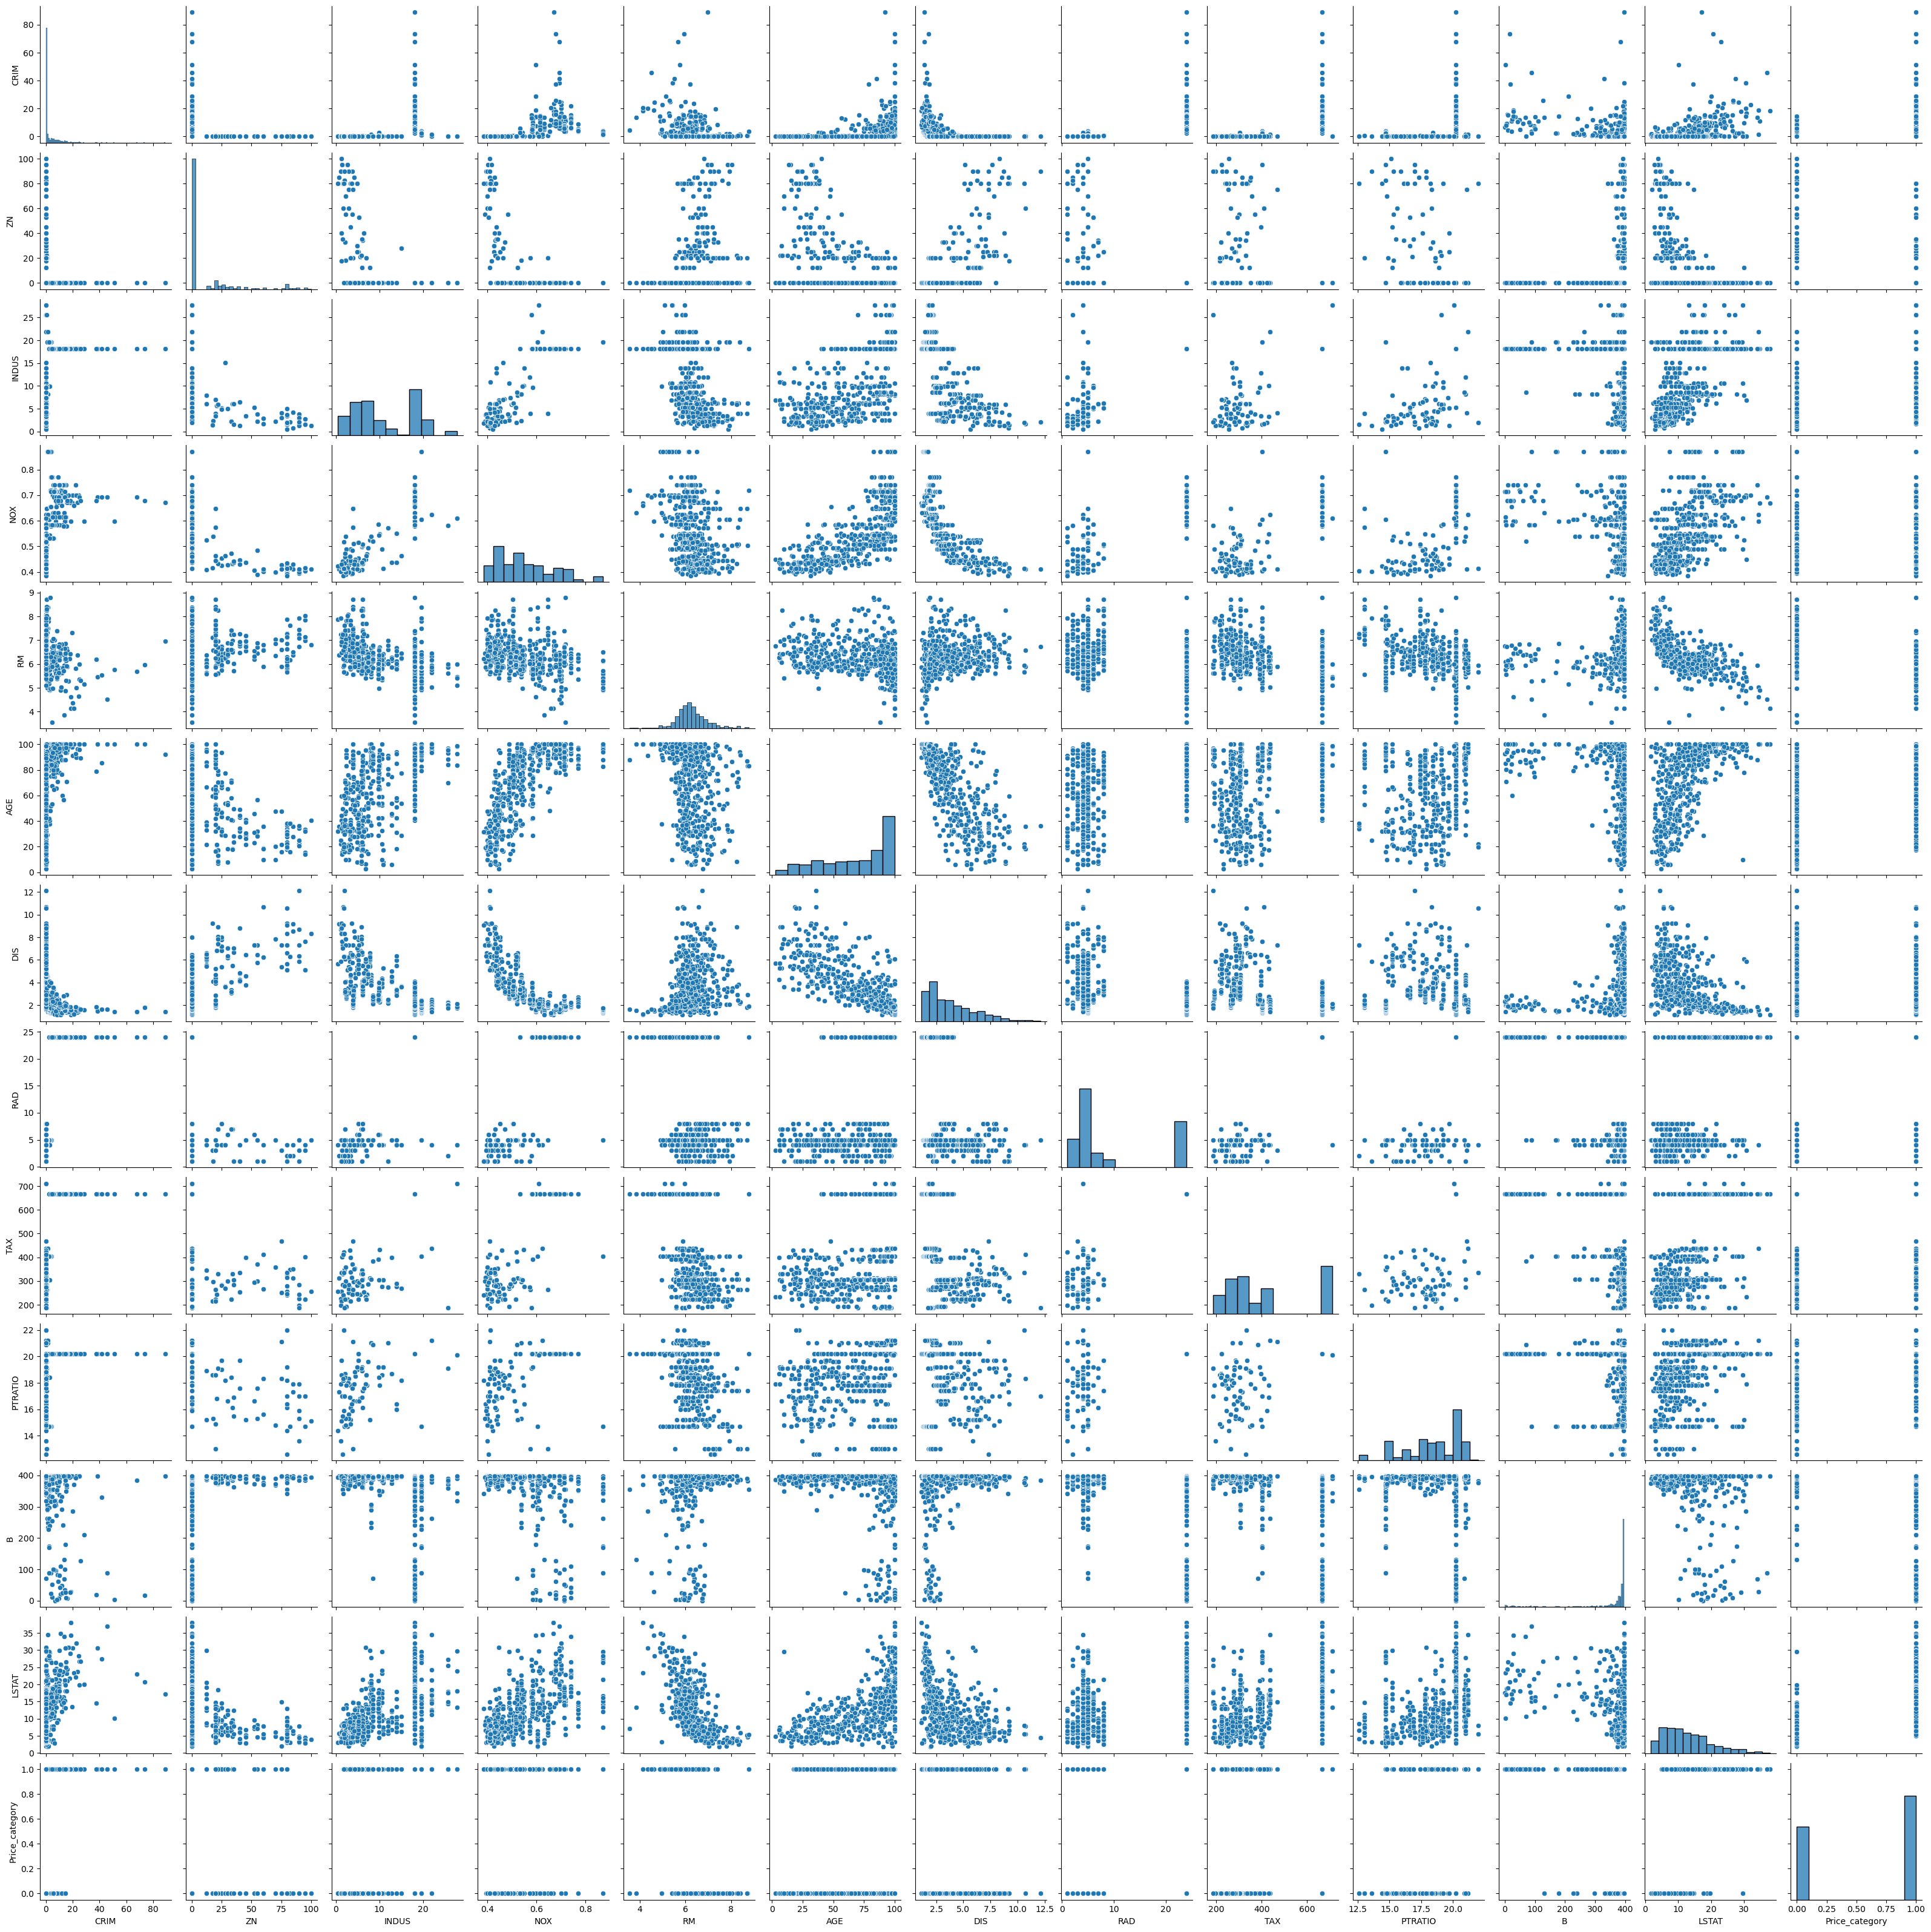

In [32]:
import seaborn as sns
sns.pairplot(dataset)

## Analyzing The Correlated Features

In [33]:
dataset.corr()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price_category
CRIM,1.000000,-0.200469,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,0.270464
ZN,-0.200469,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,-0.346689
INDUS,0.406583,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,0.465536
NOX,0.420972,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,0.409177
RM,-0.219247,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,-0.531995
AGE,0.352734,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,0.442344
DIS,-0.379670,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,-0.272031
RAD,0.625505,-0.311948,0.595129,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,0.316916
TAX,0.582764,-0.314563,0.720760,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,0.403174
PTRATIO,0.289946,-0.391679,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044,0.450786


Text(0, 0.5, 'Price_category')

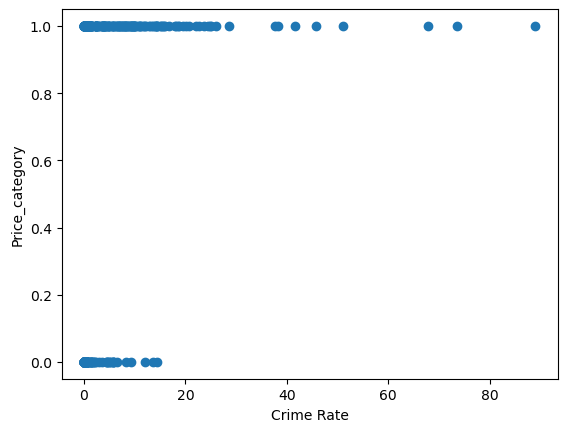

In [35]:
plt.scatter(dataset['CRIM'],dataset['Price_category'])
plt.xlabel("Crime Rate")
plt.ylabel("Price_category")

Text(0, 0.5, 'Price')

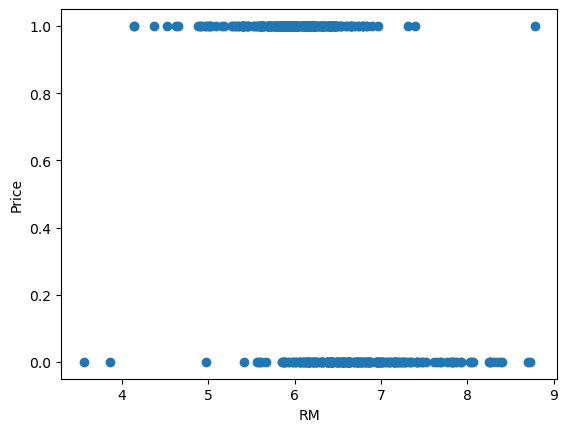

In [36]:
plt.scatter(dataset['RM'],dataset['Price_category'])
plt.xlabel("RM")
plt.ylabel("Price")

<Axes: xlabel='RM', ylabel='Price_category'>

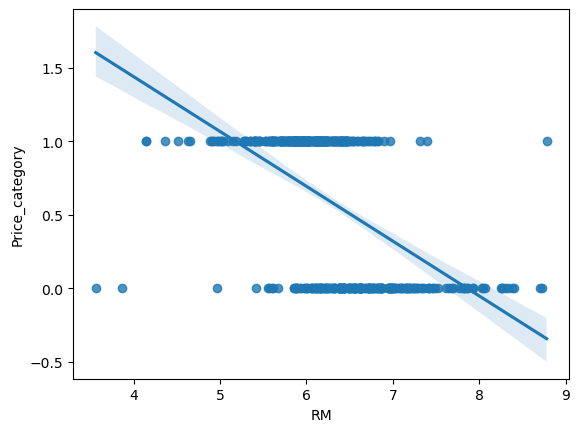

In [37]:
import seaborn as sns
sns.regplot(x="RM",y="Price_category",data=dataset)

<Axes: xlabel='LSTAT', ylabel='Price_category'>

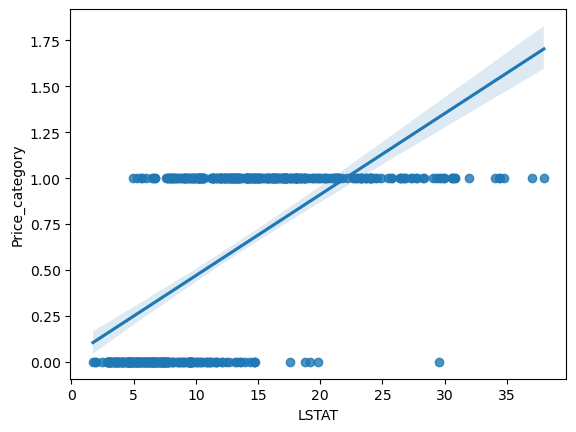

In [38]:
sns.regplot(x="LSTAT",y="Price_category",data=dataset)

<Axes: xlabel='PTRATIO', ylabel='Price_category'>

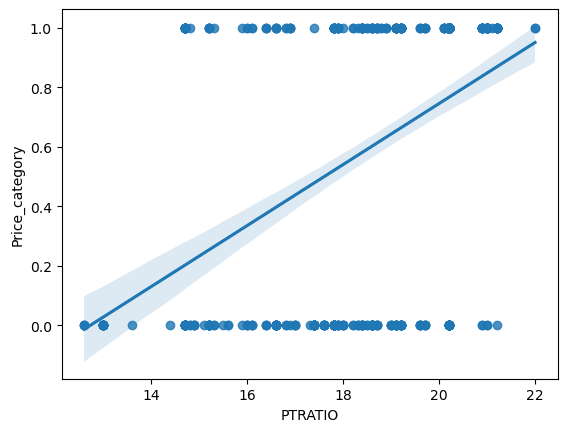

In [39]:
sns.regplot(x="PTRATIO",y="Price_category",data=dataset)

In [40]:
## Independent and Dependent features

X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [41]:
X.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [42]:
y

0      0
1      1
2      0
3      0
4      0
      ..
501    1
502    1
503    0
504    1
505    1
Name: Price_category, Length: 506, dtype: int32

In [43]:
##Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [44]:
X_train

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0.547,6.176,72.5,2.7301,6.0,432.0,17.8,393.30,12.04
45,0.17142,0.0,6.91,0.448,5.682,33.8,5.1004,3.0,233.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,0.580,5.926,71.0,2.9084,24.0,666.0,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.520,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.464,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.740,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


In [45]:
X_test

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
72,0.09164,0.0,10.81,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
452,5.09017,0.0,18.10,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...
441,9.72418,0.0,18.10,0.740,6.406,97.2,2.0651,24.0,666.0,20.2,385.96,19.52
23,0.98843,0.0,8.14,0.538,5.813,100.0,4.0952,4.0,307.0,21.0,394.54,19.88
225,0.52693,0.0,6.20,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63
433,5.58107,0.0,18.10,0.713,6.436,87.9,2.3158,24.0,666.0,20.2,100.19,16.22


In [47]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [48]:
X_train=scaler.fit_transform(X_train)

In [49]:
X_test=scaler.transform(X_test)

In [50]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [51]:
X_train

array([[-0.41425879, -0.50512499, -1.29214218, ...,  0.18727079,
         0.39651419, -1.01531611],
       [-0.40200818, -0.50512499, -0.16208345, ..., -0.21208981,
         0.3870674 , -0.05366252],
       [-0.39721053, -0.50512499, -0.60948856, ..., -0.16771641,
         0.42854113, -0.31132373],
       ...,
       [-0.41604586,  3.03838247, -1.3166773 , ..., -0.56707702,
         0.35987906, -0.90549329],
       [ 0.92611293, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.87841346,  1.52750437],
       [-0.39030549, -0.50512499, -0.37135358, ...,  1.16348561,
        -3.32828832, -0.25218837]])

In [52]:
X_test

array([[-0.406801  , -0.50512499, -1.02225586, ..., -0.74457062,
         0.41241246, -0.47605794],
       [-0.41105674,  1.26662874, -0.68165068, ..., -0.30083661,
         0.42854113, -1.25185755],
       [-0.4051199 , -0.50512499,  2.39678516, ...,  0.8084984 ,
         0.35031705,  0.79535229],
       ...,
       [-0.35439903, -0.50512499, -0.71195877, ..., -0.38958342,
         0.25688594, -1.09697922],
       [ 0.25423453, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.98970133,  0.53487511],
       [ 0.77732457, -0.50512499,  1.00549958, ...,  0.8528718 ,
         0.33199949,  0.56585078]])

## Model Training

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
LR=LogisticRegression()

In [57]:
LR.fit(X_train,y_train)

LogisticRegression()

In [58]:
## print the coefficients and the intercept
print(LR.coef_)

[[ 0.27543859 -0.18342704  0.20907511  0.14172632 -0.71458819  0.65427637
   0.95657761 -1.25859052  0.79698079  0.95034832 -0.12433003  1.98601806]]


In [59]:
print(LR.intercept_)

[0.59966127]


In [60]:
## on which parameters the model has been trained
LR.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [61]:
### Prediction With Test Data
reg_pred=LR.predict(X_test)

In [62]:
reg_pred

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1])

## Assumptions

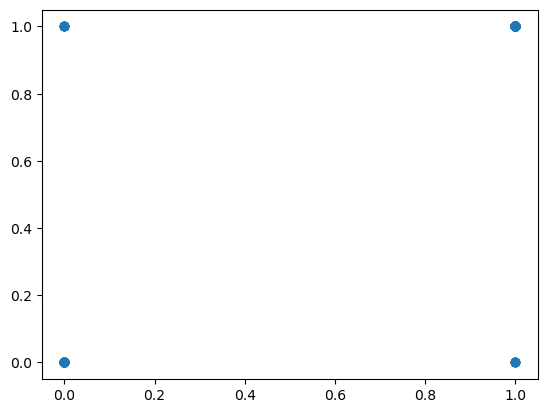

In [63]:
## plot a scatter plot for the prediction
plt.scatter(y_test,reg_pred)

In [64]:
## Residuals
residuals=y_test-reg_pred

In [65]:
residuals

173    0
274    0
491    0
72     0
452    0
      ..
441    0
23     0
225    0
433    0
447    0
Name: Price_category, Length: 152, dtype: int32

c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


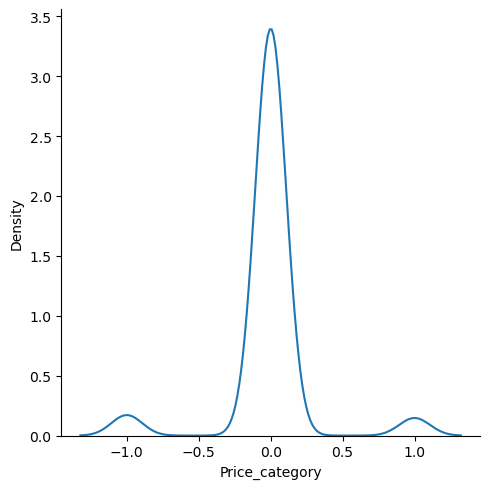

In [66]:
## Plot this residuals 

sns.displot(residuals,kind="kde")

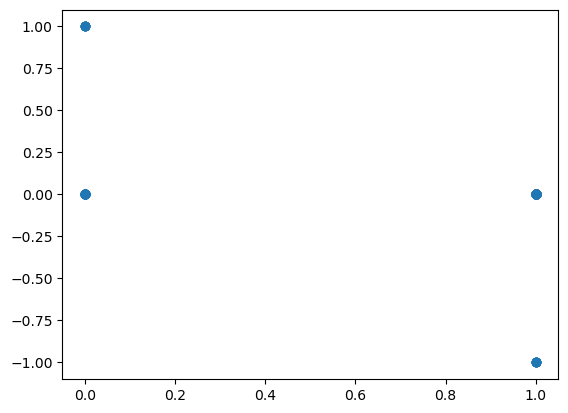

In [67]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(reg_pred,residuals)

In [68]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

0.08552631578947369
0.08552631578947369
0.2924488259328009


## R square and adjusted R square


Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares


In [69]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.6234038498189441


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [70]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5908919519615868

## New Data Prediction

In [78]:
import numpy as np

# Assuming boston.data.iloc[0] is a Pandas Series
boston.data.iloc[0].to_numpy().reshape(1, -1)
#boston.data.iloc[0].reshape(1,-1)

array([[0.00632, 18.0, 2.31, '0', 0.538, 6.575, 65.2, 4.09, 1.0, 296.0,
        15.3, 396.9, 4.98]], dtype=object)

In [82]:
##transformation of new data
new_data = boston.data.iloc[0].to_numpy().reshape(1, -1)
new_data = np.delete(new_data, 3)  # Removes the element at index 3

new_data_reshaped = new_data.reshape(1, -1)

# Now you can use 'scaler.transform()' on 'new_data_reshaped'
scaled_data = scaler.transform(new_data_reshaped)
#scaler.transform(boston.data.iloc[0].to_numpy().reshape(1, -1).np.delete(3))

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [83]:
new_data = boston.data.iloc[0].to_numpy().reshape(1, -1)
new_data = np.delete(new_data, 3)  # Removes the element at index 3

new_data_reshaped = new_data.reshape(1, -1)
LR.predict(scaler.transform(new_data_reshaped))

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

## Pickling The Model file For Deployment

In [84]:
import pickle

In [85]:
pickle.dump(LR,open('regmodel.pkl','wb'))

In [86]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [87]:
## Prediction
new_data = boston.data.iloc[0].to_numpy().reshape(1, -1)
new_data = np.delete(new_data, 3)  # Removes the element at index 3

new_data_reshaped = new_data.reshape(1, -1)
pickled_model.predict(scaler.transform(new_data_reshaped))

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])